In [ ]:
#Predicting selling price of used cars - ML Project

In [27]:
import pandas as pd

In [28]:
df = pd.read_csv('car data.csv')

In [29]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [30]:
df.shape

(301, 9)

In [31]:
##Categorial features

print(df['Seller_Type'].unique())
print(df['Fuel_Type'].unique())
print(df['Owner'].unique())
print(df['Transmission'].unique())

['Dealer' 'Individual']
['Petrol' 'Diesel' 'CNG']
[0 1 3]
['Manual' 'Automatic']


In [32]:
##Cheking missing values / null values

df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [33]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [34]:
df.columns


Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [35]:
##Try predict the selling price of car not based on type of car, so removed 'cars' column
##since, there's no mathematical impact from type of "cars"

final_dataset = df[['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']]

In [36]:
final_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [37]:
final_dataset['current_year']=2022

In [38]:
final_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,current_year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2022
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2022
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2022
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2022
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2022


In [39]:
##Derving a new feature 'Number of years' based on 'Current_year' and 'Year'

final_dataset['Num_of_years'] = final_dataset['current_year']-final_dataset['Year']

In [40]:
final_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,current_year,Num_of_years
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2022,8
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2022,9
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2022,5
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2022,11
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2022,8


In [41]:
final_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,current_year,Num_of_years
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2022,8
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2022,9
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2022,5
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2022,11
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2022,8


In [43]:
## remove the features 'Year' and 'current_year', since we have already derived a feature depenedent on both of them

final_dataset.drop(['current_year'], axis = 1, inplace = True)
final_dataset.drop(['Year'], axis = 1, inplace = True)

In [44]:
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Num_of_years
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,8
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,9
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,5
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,11
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,8


In [45]:
##Perform one hot encoding on categorical features using pandas.dummies function

final_dataset = pd.get_dummies(final_dataset, drop_first=True)

In [49]:
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Num_of_years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,8,0,1,0,1
1,4.75,9.54,43000,0,9,1,0,0,1
2,7.25,9.85,6900,0,5,0,1,0,1
3,2.85,4.15,5200,0,11,0,1,0,1
4,4.60,6.87,42450,0,8,1,0,0,1


In [50]:
##Checking for correlation

final_dataset.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,Num_of_years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
Num_of_years,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


In [51]:
import seaborn as sns

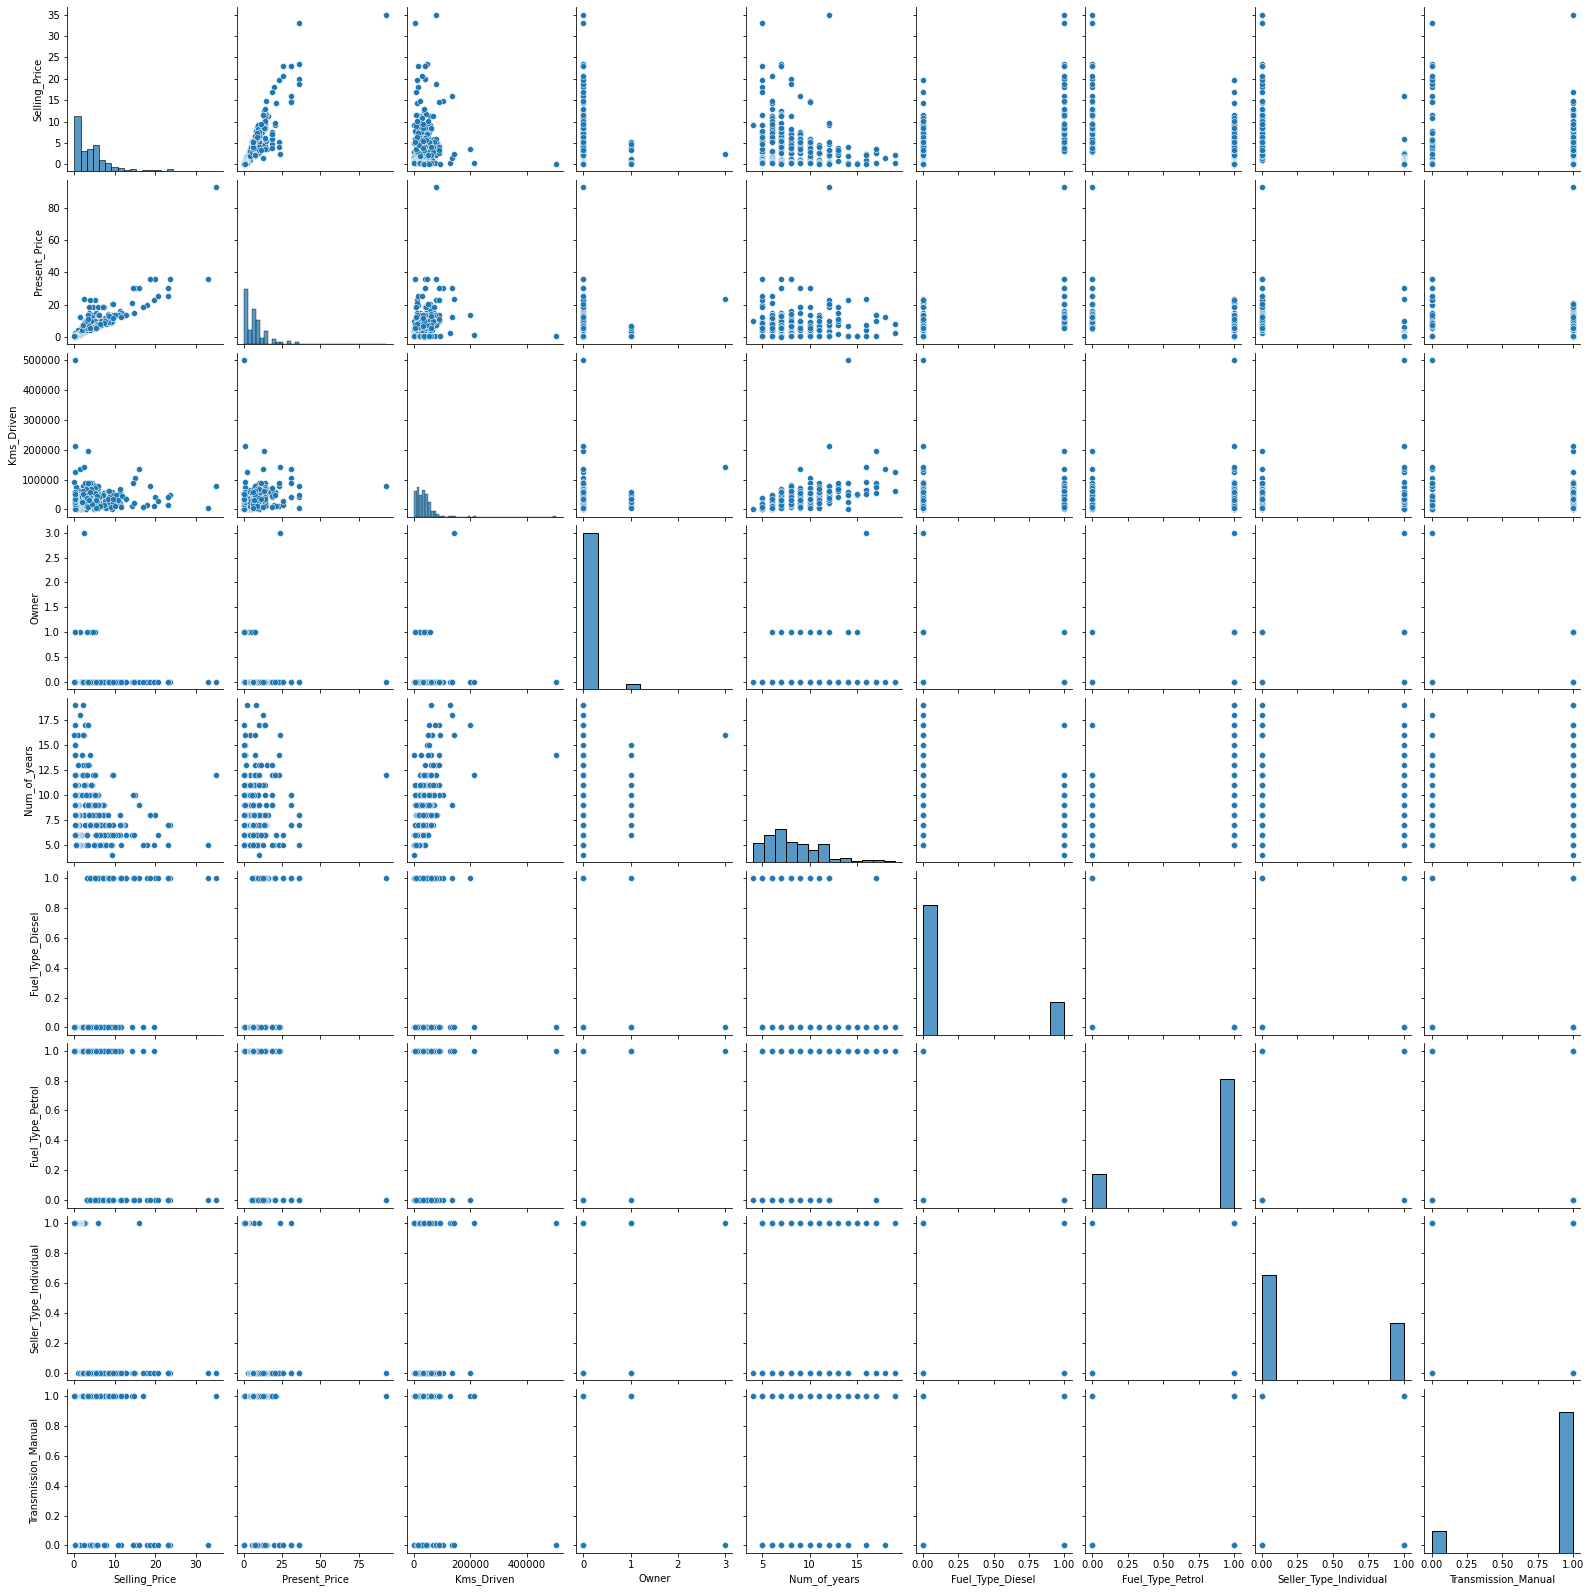

In [52]:
sns.pairplot(final_dataset)

In [54]:
import matplotlib.pyplot as plt
%matplotlib inline

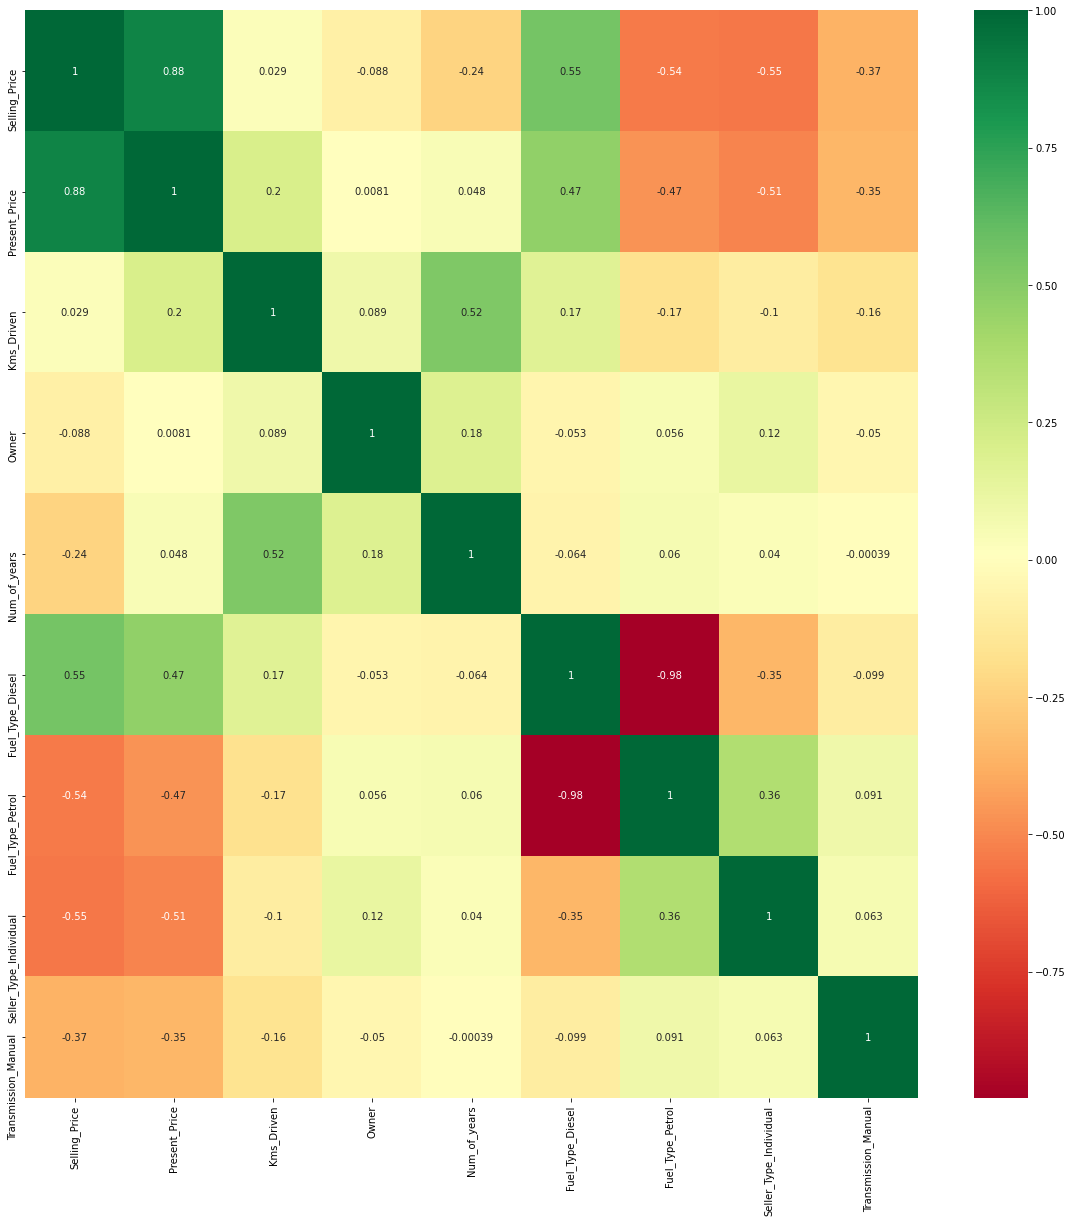

In [56]:
corrmat = final_dataset.corr()
top_corr_features = corrmat.index
plt.figure(figsize = (20,20))

##Plotting heatmap for correlation
g = sns.heatmap(final_dataset[top_corr_features].corr(),annot = True, cmap = "RdYlGn")

In [57]:
## Selling_price is dependent feature (or output or "y")
##Remaining all features are independent features (or inputs or "x")

X = final_dataset.iloc[:,1:] ##all rows,all columns except first column(0th index)
y = final_dataset.iloc[:,0] ##all rows,only first column(0th index)

In [58]:
X.head()

,Present_Price,Kms_Driven,Owner,Num_of_years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,8,0,1,0,1
1,9.54,43000,0,9,1,0,0,1
2,9.85,6900,0,5,0,1,0,1
3,4.15,5200,0,11,0,1,0,1
4,6.87,42450,0,8,1,0,0,1


In [59]:
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [63]:
##Feature importance - To know which features are important
## But however, for this project since the numbers of features are less, we have considered all features

from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,y)
print(model.feature_importances_)

[3.70397251e-01 4.27712972e-02 3.42830966e-04 7.32419825e-02
 2.29295659e-01 9.29013564e-03 1.28954665e-01 1.45706179e-01]


In [66]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train, y_test = train_test_split(X,y,test_size=0.2)

In [68]:
X_train.shape

(240, 8)

In [72]:
y_train.shape

(240,)

In [73]:
from sklearn.ensemble import RandomForestRegressor
rf_random = RandomForestRegressor()

In [76]:
##Hyperparamters

import numpy as np

##Number of decision trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
print(n_estimators)

##Number of features to be considered as every split
max_features = ['auto', 'sqrt']

##Maximum number of levels in a tree
max_depth = [int(x) for x in np.linspace(5,30, num = 6)]

##Minimum number of samples required to split a node
min_samples_split = [2,5,10,15,100]

##Minimum number of samples required at each leaf node
min_samples_leaf = [1,2,5,10]

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [77]:
from sklearn.model_selection import RandomizedSearchCV

In [78]:
##Creating the random grid for selecting the best hyperparamteres

random_grid = { 'n_estimators' : n_estimators,
              'max_features' : max_features,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [79]:
rf = RandomForestRegressor()

In [80]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions=random_grid, scoring='neg_mean_squared_error', n_iter=10, cv=5, verbose=2, random_state=42, n_jobs=1)

In [81]:
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   4.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   5.6s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   7.4s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   4.0s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [83]:
predictions = rf_random.predict(X_test)
predictions

array([ 0.68666,  0.25257,  4.47355,  3.16448,  5.65666,  5.98845,
        0.75643,  1.21522,  1.24164, 13.10745, 10.6066 ,  3.43296,
        1.11562,  5.24067,  7.40501,  4.9931 ,  8.1096 ,  8.20666,
        8.78755,  5.39197,  2.55509,  5.64565,  8.52992,  5.42295,
        1.14287,  6.81264,  0.479  ,  0.88385,  1.03383,  8.59534,
        0.27765,  7.0061 ,  9.05541,  8.55541,  8.96298,  0.89818,
        0.6187 ,  0.53339,  0.6497 ,  6.59492,  3.59153,  1.42076,
        1.12364,  5.62209,  3.1455 ,  8.03763,  4.4001 ,  0.91886,
        0.50419,  9.01337,  4.21268,  8.8881 , 20.61744,  0.71307,
        0.5424 ,  0.50408,  0.36428,  6.95688,  0.9313 ,  1.45325,
        3.43291])

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Selling_Price', ylabel='Density'>

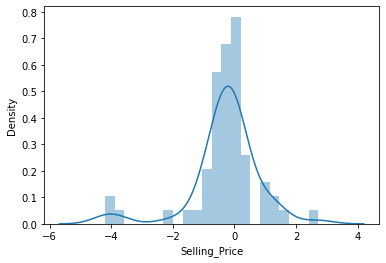

In [85]:
###Verfying the predictions made by the model wrt actual values(y_test)

sns.distplot(y_test-predictions)

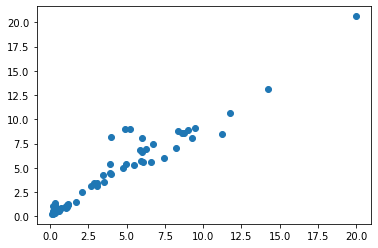

In [86]:
##actual outputs(y_test) and predictions made by our model are almost linear, so model is working good

plt.scatter(y_test, predictions)

In [88]:
import pickle

##Opening a file, where I want to store the data in "writebyte mode"
file = open('random_forest_regression_model.pkl', 'wb')

##Dumping info to the above file
pickle.dump(rf_random,file)